In [39]:
%matplotlib notebook

from modsim import *








#Units
Kg= UNITS.kilogram
N= UNITS.kilogram * UNITS.meter / UNITS.second**2
Km= 1000 * UNITS.meter
degree = UNITS.degree
s = UNITS.second
m = UNITS.meter

#Variables

No_Change= System(
G = 6.674 * 10**-11,
Mass_Earth= 5.972 * 10**24,
Mass_Mars= 6.39 * 10**23,
Mass_Victim= 70,
Distance_Earth_Victim= 637100,


Force_Punch=  3.48 *10**8,

Punch_Time = .125,
Distance_Victim_Mars= 225 * 10**5
,
    )

Equations= System(


Punch_Velocity = No_Change.Force_Punch * No_Change.Punch_Time / No_Change.Mass_Victim,
accel_ge = -((No_Change.G) * No_Change.Mass_Earth) / (No_Change.Distance_Earth_Victim **2),
accel_gm = -((No_Change.G) * No_Change.Mass_Mars) / (No_Change.Distance_Victim_Mars **2)
                 )


condition = Condition(y= 0,
                      earth_g= Equations.accel_ge,
                      mars_g = Equations.accel_gm,
                      Mass_Earth= No_Change.Mass_Earth,
                      Mass_Mars= No_Change.Mass_Mars,
                      Mass_Victim= 70,
                      Distance_Earth_Victim= 637100,
                      Distance_Victim_Mars= 225 * 10**8,
                      init_a = No_Change.Force_Punch/No_Change.Mass_Victim,
                      init_v = Equations.Punch_Velocity,
                      duration = 3600,
                      G = No_Change.G
                      )


flight=System(y_pos=0, y_vel=condition.init_v, y_accel=-9.8 , ts = linspace(0,condition.duration, 36000),
              timekeep = 0)


def run_steps(system, ts):
    for t in ts:
        system.timekeep = t
        step(system)
        #if t > .1:
            #plot_system(system)
        if system.y_pos >= condition.Distance_Victim_Mars:
            break
        if system.y_pos < 0:
            break
        
def step(system):
    Dist_E_V = condition.Distance_Earth_Victim + system.y_pos
    
    Dist_M_V = condition.Distance_Victim_Mars - system.y_pos
    
    accel_ge = -(condition.G * condition.Mass_Earth) / (Dist_E_V **2)
    accel_gm = (condition.G * condition.Mass_Mars) / (Dist_M_V **2)
    
    a = accel_ge + accel_gm
    
    system.y_accel = a
    system.y_vel = system.y_vel + (system.y_accel*system.ts[1])
    system.y_pos = system.y_pos + (system.y_vel*system.ts[1])
    
    
def plot_system(system):
    plot(system.timekeep,system.y_pos, 'rs-', label='position')
    decorate_pos()
    
def decorate_pos():
    decorate(title='Flight to Mars',
            xlabel='Flight time (sec)',
            #ylabel='Distance from Earth (m)')
            ylabel='Distance from Earth (m)')
    
run_steps(flight,flight.ts)
print(flight.timekeep)
print(flight.y_accel)

3600.0
-7.97596121349e-05


In [44]:
#Parameter Sweep!!!!!!!!!!!!!!!

#def sweep_parameters(beta_array, gamma_array):
#frame = SweepFrame(columns=gamma_array)
#for gamma in gamma_array:
#frame[gamma] = sweep_beta(beta_array, gamma)
#return frame

#force_array= linspace(1 *10**10 * N, 6 *10**14 * N, 36000)

def run_steps(system, ts):
    for t in ts:
        system.timekeep = t
        step(system)
        if system.y_pos >= condition.Distance_Victim_Mars:
            break

force_array= linspace(1 *10**10, 8 *10**13, 300)

def sweep_force(force_array):
    sweep_time = []
    sweep_vel = []
    sweep_accel = []
    for force in force_array:
        No_Change= System(
        G = 6.674 * 10**-11,
        Mass_Earth= 5.972 * 10**24,
        Mass_Mars= 6.39 * 10**23,
        Mass_Victim= 70,
        Distance_Earth_Victim= 637100,


        Force_Punch= force,


        Distance_Victim_Mars= 225 * 10**8,
        Punch_Time = .125,
        )
        Equations= System(
       
        Punch_Velocity = No_Change.Force_Punch * No_Change.Punch_Time / No_Change.Mass_Victim,
        accel_ge = -((No_Change.G) * No_Change.Mass_Earth) / (No_Change.Distance_Earth_Victim **2),
        accel_gm = -((No_Change.G) * No_Change.Mass_Mars) / (No_Change.Distance_Victim_Mars **2)
                 )
        
        condition = Condition(y= 0,
                      earth_g= Equations.accel_ge,
                      mars_g = Equations.accel_gm,
                      Mass_Earth= No_Change.Mass_Earth,
                      Mass_Mars= No_Change.Mass_Mars,
                      Mass_Victim= 70,
                      Distance_Earth_Victim= 637100,
                      Distance_Victim_Mars= 225 * 10**8,
                      init_a = No_Change.Force_Punch/No_Change.Mass_Victim,
                      init_v = Equations.Punch_Velocity,
                      duration = 3600,
                      G = No_Change.G
                      )
        
        flight=System(y_pos=0, y_vel=condition.init_v, y_accel= condition.init_a, ts = linspace(0,condition.duration, 36000),
             y_postokeep=[], y_veltokeep=[], y_acceltokeep=[], timekeep = 0, velkeep = condition.init_v, accelkeep= condition.init_a)
        
        run_steps(flight,flight.ts)
        sweep_time.append(flight.timekeep)
        sweep_vel.append(flight.velkeep)
        sweep_accel.append(flight.accelkeep)
    return sweep_time


In [45]:
times = sweep_force(force_array)


<IPython.core.display.Javascript object>


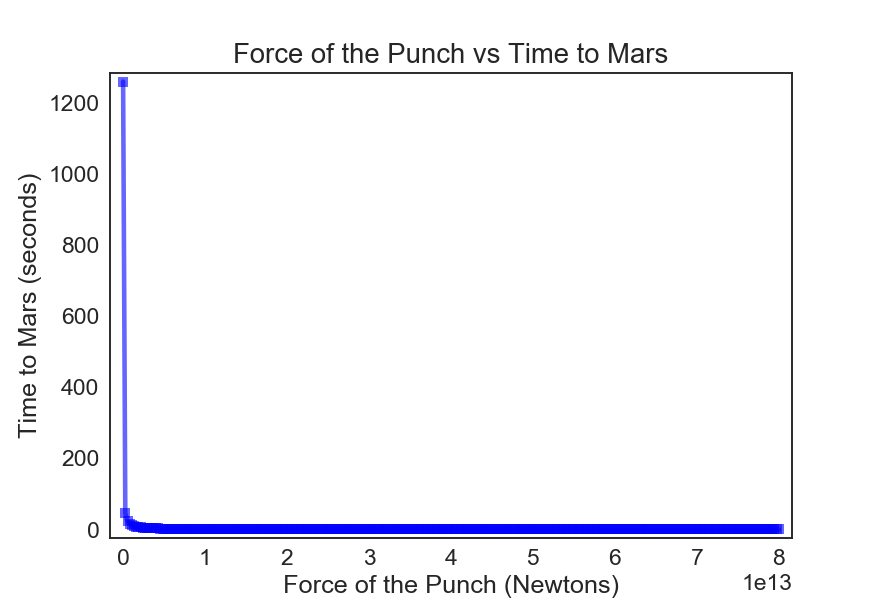

C:\Users\lzuniga\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [46]:
newfig()

plot(force_array, times,'bs-',label='')

decorate(title='Force of the Punch vs Time to Mars',
        xlabel='Force of the Punch (Newtons)',
        ylabel='Time to Mars (seconds)')